<img src="Data/Input/UP Data Science Society Logo 2.png" width=700 />

# [1] Python for Statistics
# [1.1] Summary Statistics, Random Numbers and Probability.
**Prepared by:**

- Lanz Lagman
- Dexter To
- Joshua Castillo

**Topics to cover:** 

- Summary statistics 
- Random numbers and probability


**References:**
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [(Vanderplas) Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I. Summary statistics 

- Let us use the [Titanic dataset](https://www.kaggle.com/c/titanic) for this week's discussion. This dataset is commonly used for testing machine learning methods in order to predict which passengers were most likely to have survived the 1912 disaster.
- We can use [`Seaborn`](https://seaborn.pydata.org/) in order to import this dataset. In future lessons we'll use `Seaborn` for more aesthetic data visualization.

In [ ]:
import seaborn as sns

- Import the Titanic dataset as `titanic_df`.

In [ ]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- Inspect available columns.

In [ ]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

The columns stand for the following:

- `'survived'` State if the passenger survived ; `0 = No`, `1 = Yes` 
- `'pclass'` Ticket class  ; `	1 = 1st`,` 2 = 2nd`, `3 = 3rd` ; 1st = Upper, 2nd = Middle, 3rd = Lower
- `'sex'` Sex ; `male` , `female`
- `'age'` Age 
- `'sibsp'` Number of siblings / spouses aboard the Titanic
- `'parch'` Number of parents / children aboard the Titanic
- `'fare'` Ticket/Fare price
- `'embarked'` Port of Embarkation `C = Cherbourg`,` Q = Queenstown`,`S = Southampton`
- `'class'` Ticket class  ; `	First = 1st`,` Second = 2nd`, `Third = 3rd` ; 1st = Upper    2nd = Middle    3rd = Lower
- `'who'` Sex ; `man` , `woman`
- `'adult_male'` State if the passenger was an adult male; `False`, `True` 
- `'deck'` Deck class when the disaster happened
- `'embark_town'` Port of Embarkation `Cherbourg`,`Queenstown`,`Southampton`
- `'alive'` State if the passenger survived ; `no`, `yes` 
- `'alone'` State if the passenger was traveling alone ; `False`, `True` 

## A. Measures of Centrality
- A measure of central tendency (also referred to as measures of center) is a summary measure that attempts to describe a whole set of data with a single value that represents the middle or canter of its distribution.
- There are **three** main measures of central tendency: the *mode*, the *median* and the *mean*. Each of these measures describes a different indication of the typical or central value in the distribution.


### 1. *Arithmetic mean* (also known as the *expectation value*)
There are several statistical quantities called means, e.g., harmonic mean, geometric mean, arithmetic-geometric mean, and root-mean-square. But the widely known and commonly used is the arithmetic mean. Given a data set ${\displaystyle X=\{x_{1},\ldots ,x_{n}\}}$, the arithmetic mean (or mean or average) $\bar{x}$ , is the mean of the $n$ values ${ x_{1},x_{2},\ldots ,x_{n}}$:
\begin{equation} 
\mu=E(x)= \int_{-\infty}^{\infty} x h(x) dx
\end{equation}

- Let's check the arithmetic mean of all numeric columns from `titanic_df`.

In [ ]:
titanic_df.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

- However, it is preferrable to determine the mean of a specific numeric column only.
- In this case, we are interested in the ages of passengers.

In [ ]:
titanic_df['age'].mean()

29.69911764705882

- We can plot of a histogram of `ages`, then show the location of the mean within the histogram using `ax.axvline()`.

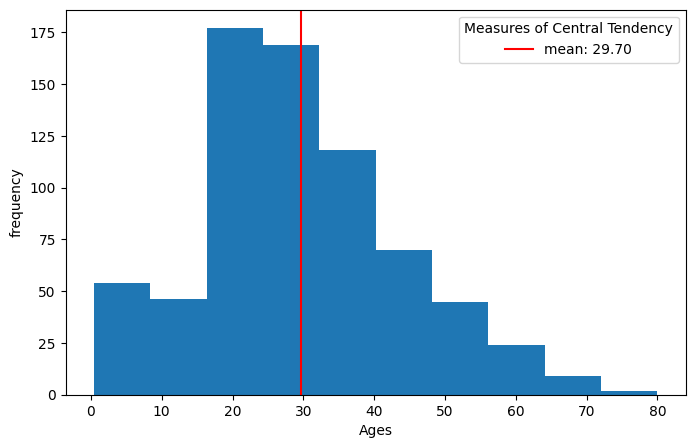

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(titanic_df['age']);
ax.axvline(titanic_df['age'].mean(), 
           c='r', label=f"mean: {titanic_df['age'].mean():.2f}")

ax.set(xlabel='Ages', ylabel='frequency')
ax.legend(title='Measures of Central Tendency')

### 2. *Median*

The statistical median is an order statistic that gives the "middle" value of a sample. More specifically, it is the value  such that an equal number of samples are less than and greater than the value (for an odd sample size), or the average of the two central values (for an even sample size). 

if $n$ is odd, 
\begin{equation} 
{\displaystyle \mathrm {median} (x)=x_{(n+1)/2}}
\end{equation} 

if $n$ is even, 
\begin{equation} 
{\displaystyle \mathrm {median} (x)=\frac{x_{n/2}+x_{((n/2)+1)}}{2}}
\end{equation} 

- Let's check the median age.

In [ ]:
titanic_df['age'].median()

28.0

- Then plot together on the histogram with mean on the histogram.

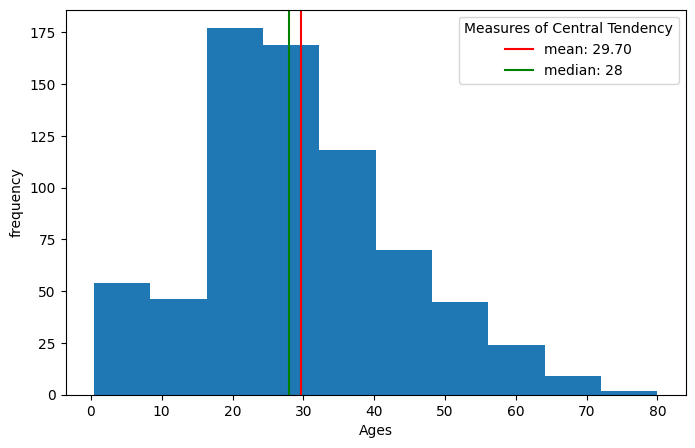

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(titanic_df['age']);

ax.axvline(titanic_df['age'].mean(), 
           c='r', label=f"mean: {titanic_df['age'].mean():.2f}")
ax.axvline(titanic_df['age'].median(), 
           c='g', label=f"median: {titanic_df['age'].median():.0f}")

ax.set(xlabel='Ages', ylabel='frequency')
ax.legend(title='Measures of Central Tendency')

### 3. *Mode* (or the most *probable value* in the case of unimodal functions), $x_m$
The mode of a set of observations is the most commonly occurring value

\begin{equation} 
\left(\frac{dh(x)}{dx}\right)_{x_m} =0
\end{equation}

For discrete variables, multiple modes can occur and are values that reach the same highest frequency.

The mode is not used as much for continuous variables because with this type of variable, it is likely that no value will appear more than once. 

- Let's check the mode of ages.

In [ ]:
titanic_df['age'].mode()

0    24.0
Name: age, dtype: float64

- Then plot together with mean and median.

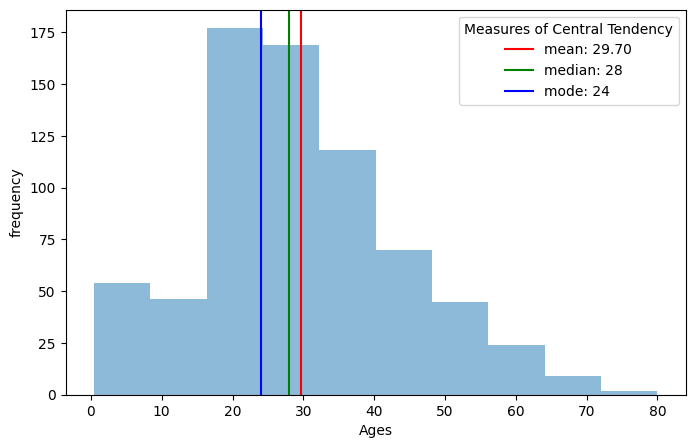

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(titanic_df['age'], alpha=0.5);

ax.axvline(titanic_df['age'].mean(), 
           c='r', label=f"mean: {titanic_df['age'].mean():.2f}")
ax.axvline(titanic_df['age'].median(), 
           c='g', label=f"median: {titanic_df['age'].median():.0f}")

for mode in titanic_df['age'].mode().values:
    ax.axvline(mode, 
               c='b', label=f"mode: {mode:.0f}")
    
ax.set(xlabel='Ages', ylabel='frequency')
ax.legend(title='Measures of Central Tendency')

- From the results above, the passenger age mean is 29.7, the median is 28 and the mode is 24

### What if we want to inspect the age distribution per class?

- It is interesting to investigate the distribution of ages per class, since we can assume that first-class passengers are more likely to survive when disaster strikes. 
- But first, we have to check the amount of passengers per class using `value_counts()`

In [ ]:
titanic_df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

- From the results above, we can say that more than half are third class passengers

- We will now split the data into different passenger class by creating separate dataframes for each.
- We can store these dataframes into a list called `Class_df_list`.

In [ ]:
Class1st_df = titanic_df[titanic_df['class']=='First'].reset_index(drop=True)
Class2nd_df = titanic_df[titanic_df['class']=='Second'].reset_index(drop=True)
Class3rd_df = titanic_df[titanic_df['class']=='Third'].reset_index(drop=True)

Class_df_list = [Class1st_df, Class2nd_df, Class3rd_df]


- We can also create a list of titles called `Class_title_list` in order to create multi-plots much easier.

In [ ]:
Class_title_list = ['1st Class', '2nd Class', '3rd Class']

- Now, we can inspect the age distibution per class by creating subplots for each.
- To create subplots, we can use `plt.hist()` to plot the age range per passenger class.
- The list of dataframes and titles will allow us to iterate over them for easier and allowing us to shorten our plotting code. 

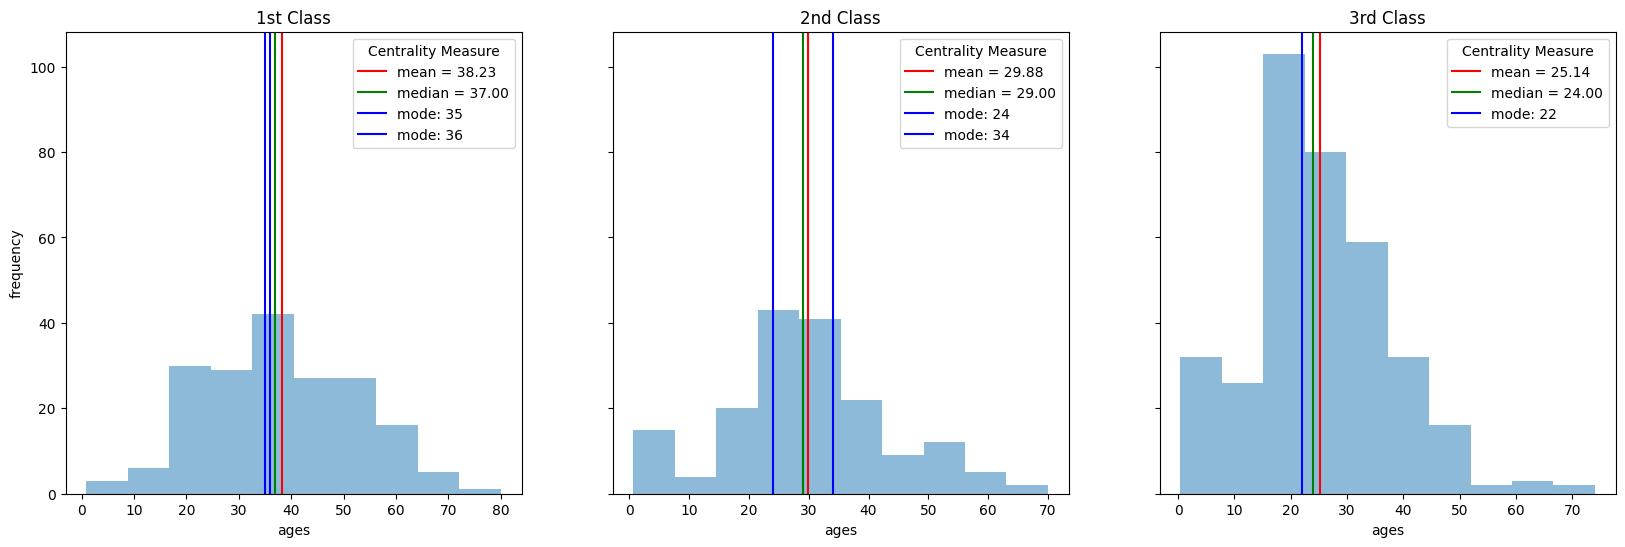

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,6), sharey=True)

for df, title, axs in zip(Class_df_list, Class_title_list, ax.reshape(-1)):
    
    axs.hist(df['age'], alpha=0.5)
    
    axs.axvline(df['age'].mean(), label=f"mean = {df['age'].mean():.2f}", color='r')
    axs.axvline(df['age'].median(), label=f"median = {df['age'].median():.2f}", color='g')
    for mode in df['age'].mode().values:
        axs.axvline(mode, 
                    c='b', label=f"mode: {mode:.0f}")
        
    axs.set(title=title, xlabel='ages')
    axs.legend(title="Centrality Measure")
    
ax[0].set(ylabel='frequency');

From our exploratory data analysis above (EDA), we can speculate the following:

- From the results above, the first class passenger age mean is 38.23, the median is 37 and the mode is 35 and 36
- We can say that the affluent passengers are really old for their time and probably are spending their time to enjoy the newly built passenger crusie ship


- The second class passenger age mean is 29.88, the median is 29 and the mode is 24 and 34
- These people are still well off and can still afford to travel but some of them might seek oppurtunity abroad


- The third class passenger age mean is 25.14, the median is 24 and the mode is 22
- These passenger class are the youngest of the group, mainly their priority is probably to search for oppurtunities abroad 

## B. Measures of Spread
- Measures of spread describes how similar or varied the set of observed values are for a particular variable
- These includes the range, quartiles and the interquartile range, variance and standard deviation.

### 1. *Variance*
Variance is the expectation of the squared deviation of a random variable from its mean. It also describes how far a set of numbers is spread out from their average value. An advantage of variance as a measure of dispersion is that it is more amenable to algebraic manipulation than other measures of dispersion such as the expected absolute deviation. Given a data set ${\displaystyle X=\{x_{1},\ldots ,x_{n}\}}$, if the random variable $x$ has a probability density function $h(x)$ and a mean of $\mu$ then, the variance $V$ is defined as

\begin{equation} 
V= \int_{-\infty}^{\infty} (x-\mu)^2 h(x) dx
\end{equation}

- `.var()` is used for getting the variance in `Pandas`. 
- Note that we have to add `ddof=0` inside the parenthesis to empasize a population since it's $N-1$ by default

### 2. *Standard deviation*
The standard deviation $\sigma$ of a probability distribution is defined as the square root of the variance $\sigma^2$. Colloquially, it is a measure of how spread out numbers are. This is given by the formula as

\begin{equation} 
\sigma=\sqrt{V}
\end{equation}

- `.std()` is used for getting the standard deviation in `Pandas` 
- Just like in `.var()`, note that we have to add `ddof=0` inside the parenthesis to empasize a population since it's $N-1$ by default.

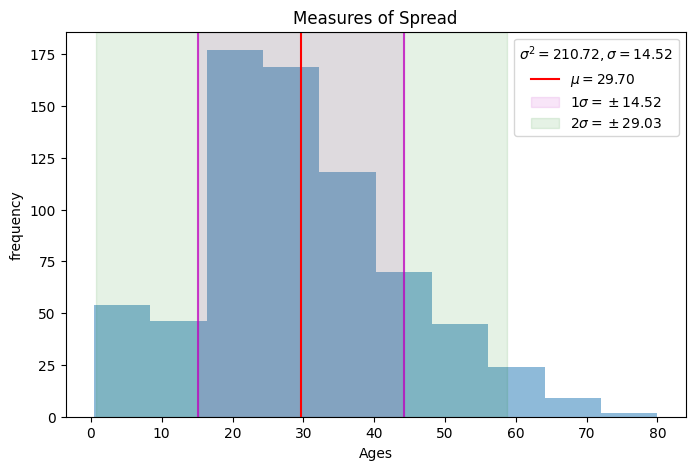

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(titanic_df['age'], alpha=0.5);

    
ax.set(title='Measures of Spread', xlabel='Ages', ylabel='frequency')

ax.axvline(titanic_df['age'].mean(), label=f"$\mu = {titanic_df['age'].mean():.2f}$", color='r')
ax.axvline(titanic_df['age'].mean() + titanic_df['age'].std(ddof=0), color='m', alpha=0.75)
ax.axvline(titanic_df['age'].mean() - titanic_df['age'].std(ddof=0), color='m', alpha=0.75)

ax.axvspan(titanic_df['age'].mean() - titanic_df['age'].std(ddof=0), 
           titanic_df['age'].mean() + titanic_df['age'].std(ddof=0), 
           label= f"$1\sigma = \pm{titanic_df['age'].std(ddof=0):.2f}$",
           color='m', alpha=0.1)

ax.axvspan(titanic_df['age'].mean() - 2*titanic_df['age'].std(ddof=0), 
           titanic_df['age'].mean() + 2*titanic_df['age'].std(ddof=0), 
           label= f"$2\sigma = \pm{2*titanic_df['age'].std(ddof=0):.2f}$",
           color='g', alpha=0.1)

ax.legend(title=f"$\sigma^2 = {titanic_df['age'].var(ddof=0):.2f}, \sigma={titanic_df['age'].std(ddof=0):.2f}$")


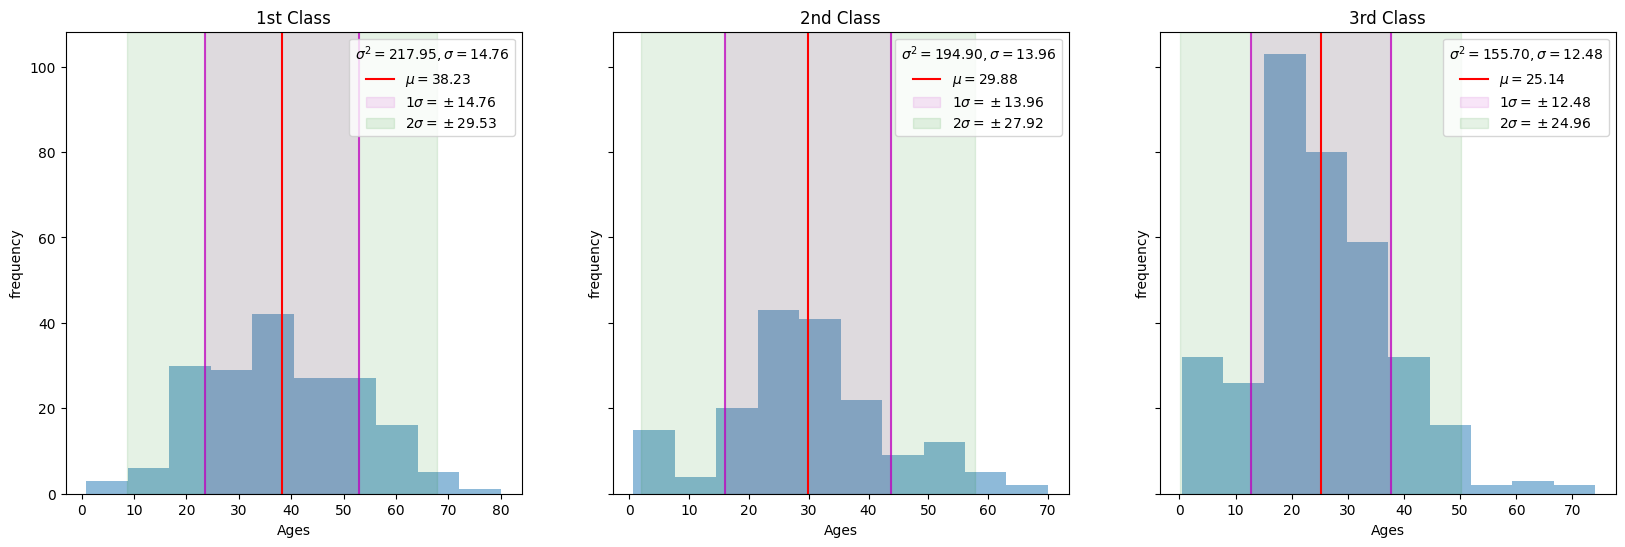

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,6), sharey=True)

for df, title, axs in zip(Class_df_list, Class_title_list, ax.reshape(-1)):

    axs.hist(df['age'], alpha=0.5);
    axs.set(title=title, xlabel='Ages', ylabel='frequency')

    axs.axvline(df['age'].mean(), label=f"$\mu = {df['age'].mean():.2f}$", color='r')
    axs.axvline(df['age'].mean() + df['age'].std(ddof=0), color='m', alpha=0.75)
    axs.axvline(df['age'].mean() - df['age'].std(ddof=0), color='m', alpha=0.75)

    axs.axvspan(df['age'].mean() - df['age'].std(ddof=0), 
                 df['age'].mean() + df['age'].std(ddof=0), 
                 label= f"$1\sigma = \pm{df['age'].std(ddof=0):.2f}$",
                 color='m', alpha=0.1)

    axs.axvspan(df['age'].mean() - 2*df['age'].std(ddof=0), 
                 df['age'].mean() + 2*df['age'].std(ddof=0), 
                 label= f"$2\sigma = \pm{2*df['age'].std(ddof=0):.2f}$",
                 color='g', alpha=0.1)
    axs.legend(title=f"$\sigma^2 = {df['age'].var(ddof=0):.2f}, \sigma={df['age'].std(ddof=0):.2f}$")


### 3. P$\%$ quantiles ($p$ is called percentile), $q_p$
The $p$th percentile $q_p$ is that value of $x$, say $x_p$, which corresponds to a cumulative frequency of $N$ $k/100$, where $N$ is the sample size.



\begin{equation} 
    \frac{p}{100} = \int^{q_p}_{-\infty} h(x) \, dx
\end{equation}
- Another way to determing spread is using the $\%$ quantiles which visualizes how many $\%$ each data fall into what ranges.
- We use `np.quantile()` to divide the data into n equal parts.
- It's possible to use `np.linspace()` to divide a range of values to `n` equal parts.

#### Quartile
- Quartile divides the data into 4 equal parts
- Below we use `np.quantile()` and `np.linspace()` to divide the dataset per class

In [ ]:
quartile_arr = np.linspace(0,1,5)
quartile_arr

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

- Here, we divided the values into 4 equal intervals
- We then proceed to use `np.quantile()` on the age column.

In [ ]:
np.quantile(titanic_df['age'], quartile_arr)

array([nan, nan, nan, nan, nan])

- Noticed that age had a `NaN` value, to workaround this we use `.dropna()` to remove the data with `NaN` calues

In [ ]:
titanic_df['age'].dropna().reset_index(drop=True)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
709    39.0
710    27.0
711    19.0
712    26.0
713    32.0
Name: age, Length: 714, dtype: float64

- Now that the problem has been sorted out, we use `np.quantile()` on the age column.

In [ ]:
quartile_age_arr = np.quantile(titanic_df['age'].dropna().reset_index(drop=True), quartile_arr)
quartile_age_arr

array([ 0.42 , 20.125, 28.   , 38.   , 80.   ])

- We can plot the age distribution histogram together with the lines for each quartile.
- It is recommended to use [matplotlib's colorcycler](https://stackoverflow.com/a/51207905) to differentiate each line from each other.

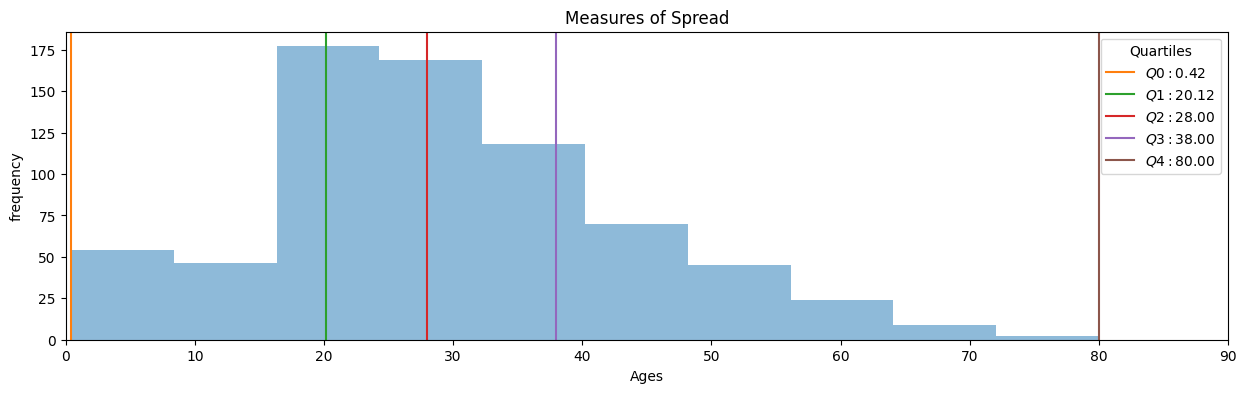

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))

ax.hist(titanic_df['age'], alpha=0.5);
ax.set(title='Measures of Spread', 
       xlabel='Ages', ylabel='frequency', xlim=(0,90))

for q,n in zip(quartile_age_arr, range(len(quartile_arr))):
    ax.axvline(q, c=next(ax._get_lines.prop_cycler)['color'], 
               label= f"$Q{n}: {q:.2f}$")
    
ax.legend(title= "Quartiles")

#### Interquartile range (IQR)
- Noticed that Quartiles divide the plot into 4 equal parts. The three lines inside the plot are called $Q1$, $Q2$ and $Q3$ respectively
- $Q1$ is the First Quartile / 25th Percentile
- $Q2$ is the Second Quartile / 50th Percentile also known as the Median
- $Q3$ is the Third Quartile / 75th Percentile
- The area between $Q1$ and $Q3$ is knowns as the Interquartile range (IQR)


- Shown below is the IQR of the age histogram.

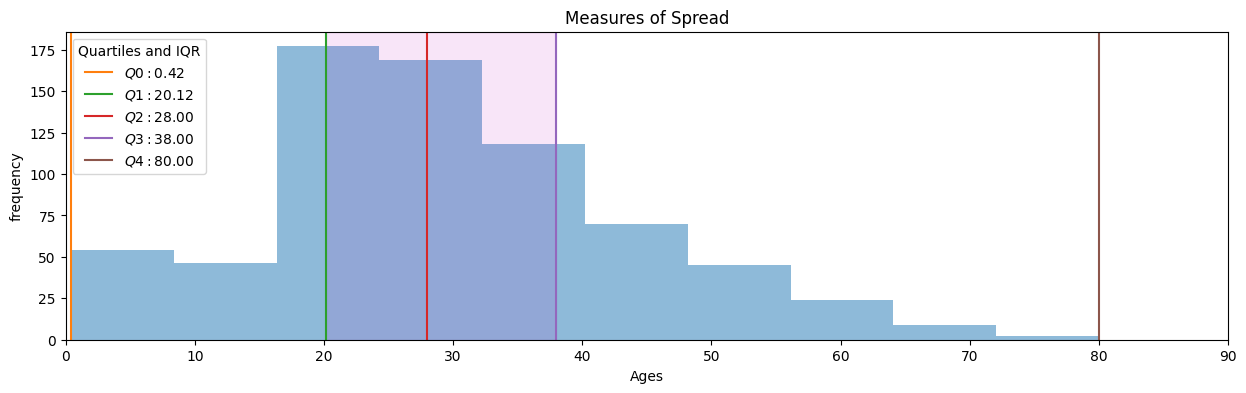

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))

ax.hist(titanic_df['age'], alpha=0.5);
ax.set(title='Measures of Spread', 
       xlabel='Ages', ylabel='frequency', xlim=(0,90))

for q,n in zip(quartile_age_arr, range(len(quartile_arr))):
    ax.axvline(q, c=next(ax._get_lines.prop_cycler)['color'], 
               label= f"$Q{n}: {q:.2f}$")
    
ax.legend(title= "Quartiles and IQR")
ax.axvspan(20.12, 38, label= "IQR",color='m', alpha=0.1)



#### Qunitile
- Quntile divides the data into 5 equal parts
- Below we use `np.quantile()` and `np.linspace()` to divide the dataset per class

In [ ]:
quintile_arr = np.linspace(0,1,6)
quintile_arr

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

- Like before we use `np.quantile()` but using the `quintile_array` on the interval

In [ ]:
quintile_age_arr = np.quantile(titanic_df['age'].dropna().reset_index(drop=True), quintile_arr)
quintile_age_arr

array([ 0.42, 19.  , 25.  , 31.8 , 41.  , 80.  ])

- Plotting, we get:

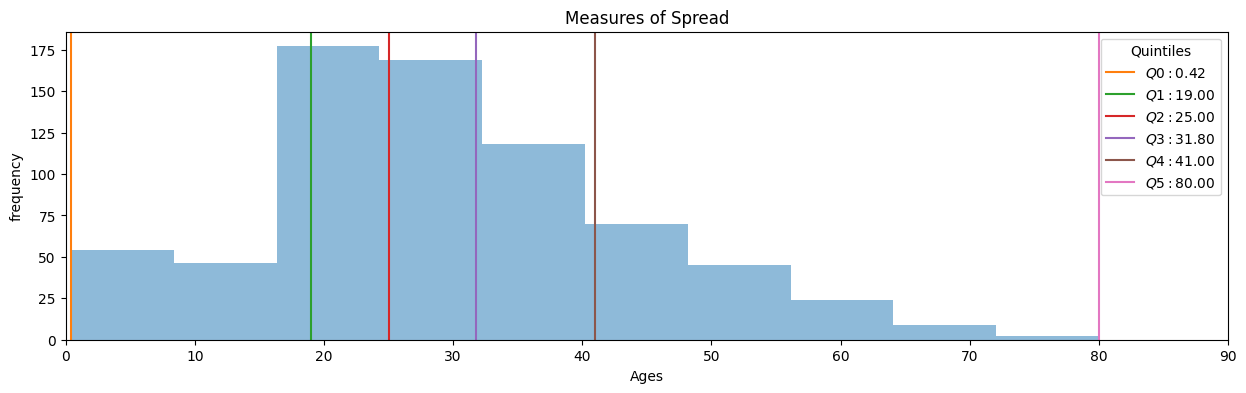

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))

ax.hist(titanic_df['age'], alpha=0.5);
ax.set(title='Measures of Spread', 
       xlabel='Ages', ylabel='frequency', xlim=(0,90))

for q,n in zip(quintile_age_arr, range(len(quintile_arr))):
    ax.axvline(q, c=next(ax._get_lines.prop_cycler)['color'], 
               label= f"$Q{n}: {q:.2f}$")
    
ax.legend(title= "Quintiles")

#### Deciles 
- Deciles divide the data into 10 equal parts
- Below we use `np.quantile()` and `np.linspace()` to divide the dataset per class

In [ ]:
decile_arr = np.linspace(0,1,11)
decile_arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- Like before we use `np.quantile()` but using the `decile_arr` on the interval

In [ ]:
decile_age_arr = np.quantile(titanic_df['age'].dropna().reset_index(drop=True), decile_arr)
decile_arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- Plotting, we get:

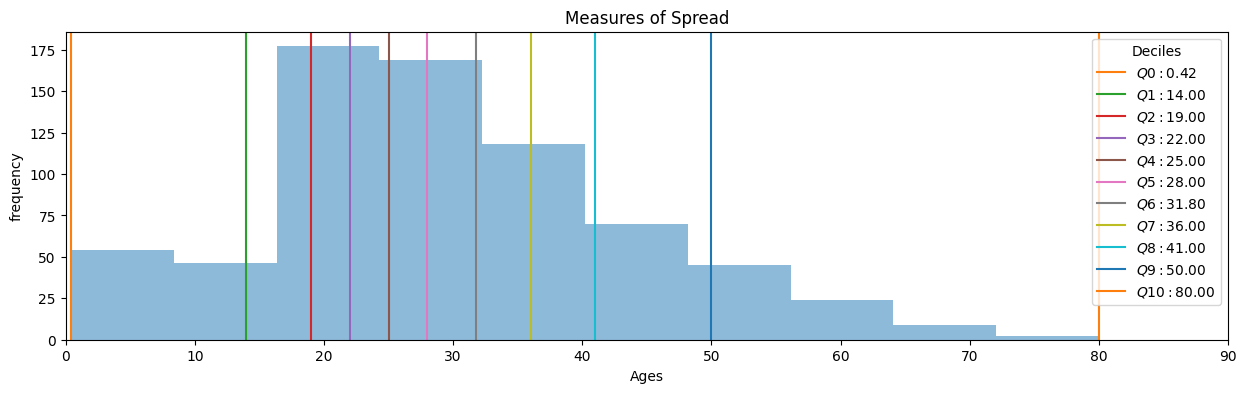

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))

ax.hist(titanic_df['age'], alpha=0.5);
ax.set(title='Measures of Spread', 
       xlabel='Ages', ylabel='frequency', xlim=(0,90))

for q,n in zip(decile_age_arr, range(len(decile_arr))):
    ax.axvline(q, c=next(ax._get_lines.prop_cycler)['color'], 
               label= f"$Q{n}: {q:.2f}$")
    
ax.legend(title= "Deciles")

## C. Measures of Shape

Measures of shape describes the distribution of the data in a dataset. The histogram can give you a general idea of the shape, but two numerical measures of shape give a more precise evaluation: Skewness and Kurtosis

### 1. *Skewness*

Skewness refers to the degree of asymmetry in a distribution. Asymmetry reflects in extreme scores in a distribution. Moreover, it includes positive and negative skewness. 

Positive Skewness - has a tail extending out to the right so, the mean is greater than the median and the mean is sensitive to each score in the distribution. Moreover, it is subject to large shifts when the sample is small and contains extreme scores.
Negative Skewness -has an extended tail pointing to the left and reflects bunching of numbers in the upper part of the distribution. Moreover, it has fewer scores at the lower end of the measurement scale.

Given a data set ${\displaystyle X=\{x_{1},\ldots ,x_{n}\}}$, if the random variable $x$ has a probability density function $h(x)$, a mean of $\mu$ and a variance of $\sigma$ then, the Skewness $\Sigma$ is defined as


\begin{equation} 
    \Sigma= \int_{-\infty}^{\infty} \left(\frac{x-\mu}{\sigma}\right)^3 \,h(x)\, dx
\end{equation}

- In this excercise, we will determine the skewness of the different passenger class.
- To determine the skewness of the dataframe, we use `.skew()`

### 2. *Kurtosis*

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur.
Tails are the tapering ends on either side of a distribution. They represent the probability or frequency of values that are extremely high or low compared to the mean. In other words, tails represent how often outliers occur.

- Distributions with medium kurtosis (medium tails) are **mesokurtic**.
- Distributions with low kurtosis (thin tails) are **platykurtic**.
- Distributions with high kurtosis (fat tails) are **leptokurtic**.


\begin{equation} 
K= \int_{-\infty}^{\infty} \left(\frac{x-\mu}{\sigma}\right)^4 \,h(x)\, dx - 3
\end{equation}

[Text(0, 0.5, 'frequency')]

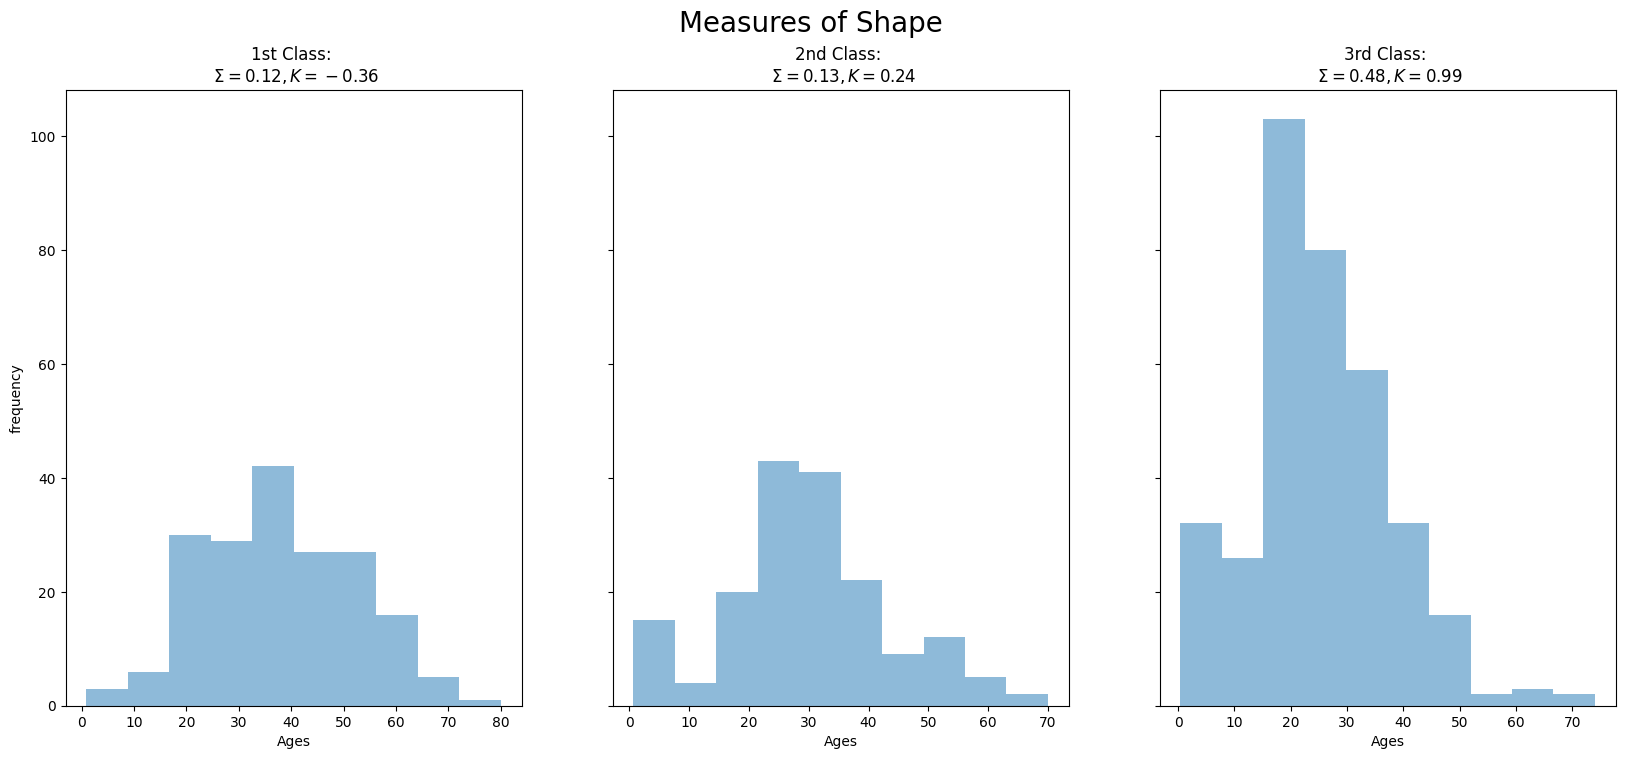

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,8), sharey=True)
fig.suptitle('Measures of Shape \n', fontsize=20)

for df, title, axs in zip(Class_df_list, Class_title_list, ax.reshape(-1)):

    axs.hist(df['age'], alpha=0.5);
    
    skew = df['age'].skew()
    kurtosis = df['age'].kurtosis()
    axs.set(title=f"{title}: \n $\Sigma = {skew:.2f}, K = {kurtosis:.2f}$", xlabel='Ages')

ax[0].set(ylabel='frequency')

# II. Random numbers and probability

## A. Sampling

- It is possible to obtain random n-samples through the `sample()` method from a dataframe.
    - If applied on a dataframe, it extracts a subset of a dataframe containing n-rows.
    - If applied on a column (series), it extracts a subset of a series containing n-rows.
- By default, sampling on the same row is not allowed.

In [ ]:
titanic_df.sample(10, random_state=420)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
722,0,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
289,1,3,female,22.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
615,1,2,female,24.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
498,0,1,female,25.0,1,2,151.5500,S,First,woman,False,C,Southampton,no,False
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
129,0,3,male,45.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,no,True
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
495,0,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True


- Setting `replace=True` allows getting samples from the same row.
- Output still depends on the random seed and its presence.

In [ ]:
titanic_df.sample(10, random_state=420, replace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
72,0,2,male,21.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
575,0,3,male,19.0,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
799,0,3,female,30.0,1,1,24.1500,S,Third,woman,False,NaN,Southampton,no,False
627,1,1,female,21.0,0,0,77.9583,S,First,woman,False,D,Southampton,yes,True
185,0,1,male,NaN,0,0,50.0000,S,First,man,True,A,Southampton,no,True
154,0,3,male,NaN,0,0,7.3125,S,Third,man,True,NaN,Southampton,no,True
266,0,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
840,0,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False


- We can visualize the distribution of the sample by creating histograms out of it.

[Text(0.5, 1.0, 'Sample Distribution (n=150)'),
 Text(0.5, 0, 'Ages'),
 Text(0, 0.5, 'frequency')]

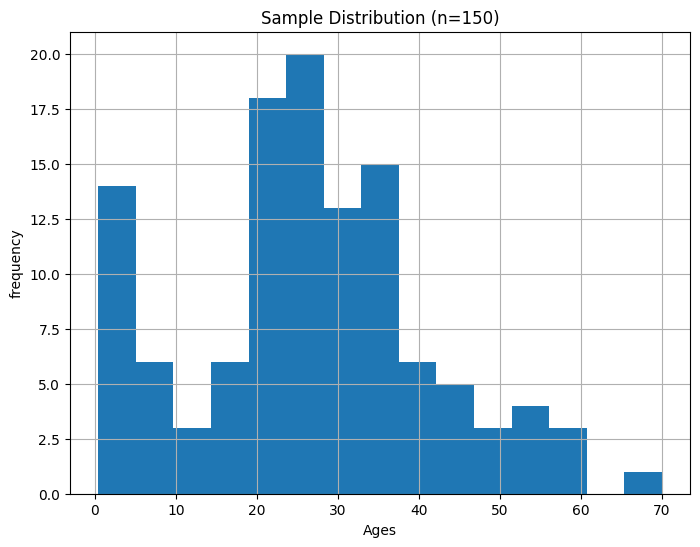

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

titanic_df['age'].sample(150, random_state=420, replace=True).hist(bins=15, ax=ax)

ax.set(title="Sample Distribution (n=150)", 
       xlabel='Ages', ylabel='frequency')

## B. Distributions

- RVS (Random Value Sample):
- PDF (Probability Density Function):
- CDF (Cumulative Distribution Function):

### 1. Discrete Distributions

### Binomial Distribution

$$ p(k|b,N) = \frac{N!}{k!(N-k)!}b^k(1-b)^{N-k}$$

Wherein

- $p(k|b,N)$: Binomial probability distribution as a function of $k$, and constants $b,N$
- $k$: Number of successful trials
- $b$: Number of unsuccessful trials i.e. failure
- $N$: total number of trials

**Observed from:**

- Probability of getting exactly n correct items in a 10 item multiple choice test thru sheer guessing
- **Probability of picking out a member from DSSoc that has a jowa**

#### Plot sample distributions using `numpy`

- Prepare list of number of trials `n_list` and number of failures `b_list`.
- The distribution of successes will be at the x-axis.

In [ ]:
n_list = [20,20,40]
b_list = [0.2,0.6,0.6]

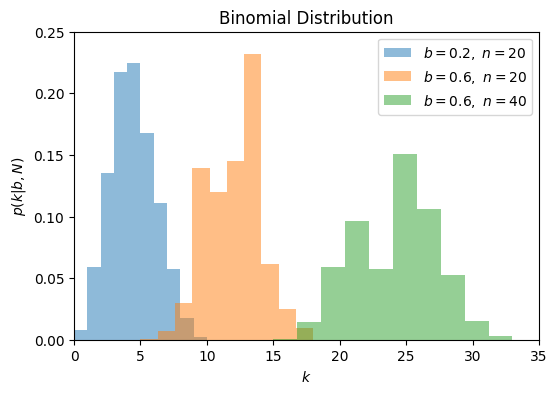

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for n, b in zip(n_list, b_list):
    np.random.seed(69)
    sample = np.random.binomial(n,b,1000)
    count, bins, ignored = ax.hist(sample, bins=10, alpha=0.5, 
                                   density=True, label=f'$b={b},\ n={n}$')
    
    ax.set(title="Binomial Distribution", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax.legend()

#### Plot probability mass functions (PMFs) using `scipy`

- PMFs are used to visualize the distribution of discrete distribution functions.
- The x-values should be an array of integers, since binomial distributions are discrete.

In [ ]:
from scipy import stats

In [ ]:
ls_list = ['-', '--', ':']
x = np.arange(0,40)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

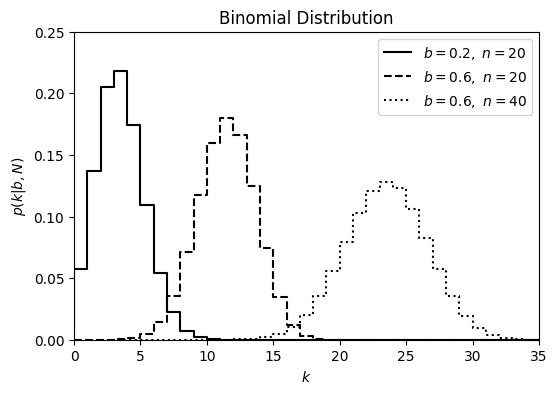

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for n, b, ls in zip(n_list, b_list, ls_list):
    
    dist = stats.binom(n, b)
    ax.step(x, dist.pmf(x), ls=ls, c='black',
             label=f'$b={b},\ n={n}$')
    
    ax.set(title="Binomial Distribution", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax.legend()

### 2. Continuous Distribution

### Uniform Distribution

$$ p(x|\mu,W) = \begin{cases}
\frac{1}{W} & |x-\mu| \leq \frac{W}{2}\\
0 & |x-\mu| > \frac{W}{2}
\end{cases}$$

Wherein:

- $p(x|\mu,W)$: Uniform distribution as a function of $x$, and constants $\mu,W$,
- $W$: width, wherein $W = b-a$,
- $\mu$: mean

**Observed from:**

- Distribution of the position of a photon detected in a finite-size pixel.
- Probability of getting one side on a fair coin or a fair die in one toss.
- Probability of drawing any one card from a clean deck.

In [ ]:
W_list = [1,2,3]

In [ ]:
np.random.seed(69)
sample1 = np.random.uniform(-0.5,0.5,10000)
sample2 = np.random.uniform(-1,1,10000)
sample3 = np.random.uniform(-1.5,1.5,10000)

sample_list = [sample1, sample2, sample3]

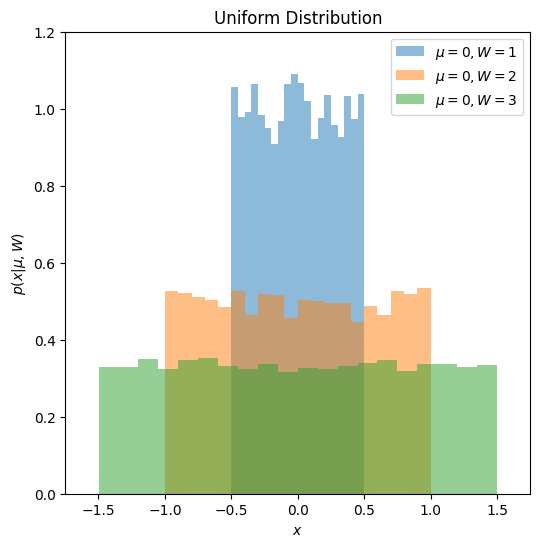

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

for W, sample, ls in zip(W_list, sample_list, ls_list):
    
    count, bins, ignored = ax.hist(sample, bins=20, alpha=0.5, 
                                   density=True, label=f'$\mu=0, W={W}$')
    
    ax.set(title="Uniform Distribution", 
           xlabel="$x$", ylabel=r"$p(x|\mu,W)$",
           xlim=(-1.75,1.75), ylim=(0,1.2))
    ax.legend()

#### Plot probability density functions (PDFs) using `scipy`

- PDFs are used to visualize the distribution of continuous distribution functions.
- The x-values could be an array of floats, since uniform distributions are continuous.

In [ ]:
x = np.linspace(-2,2,10000)
x

array([-2.        , -1.99959996, -1.99919992, ...,  1.99919992,
        1.99959996,  2.        ])

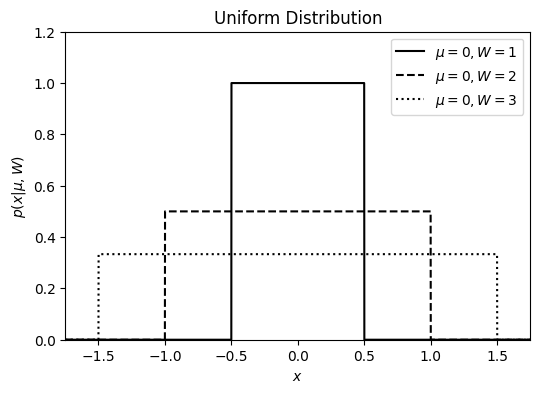

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

for W, ls in zip(W_list, ls_list):
    dist = stats.uniform(0 - 0.5*W, W)

    ax.plot(x, dist.pdf(x), ls=ls, c='black',
             label=f'$\mu=0, W={W}$')
    ax.set(title="Uniform Distribution", 
           xlabel="$x$", ylabel=r"$p(x|\mu,W)$",
           xlim=(-1.75,1.75), ylim=(0,1.2))
    ax.legend()

### End of tutorial.

---

# Sample Exercise

- Try to solve this exercise if you can

1.) In the given <i>scores </i> data below, let stdev, mean, var, and median be the standard deviation, mean, variance, and median of the <i> scores </i> data respectively. <br>
Compute and print the answer for the expression: <br>
(stdev - mean + var)/(stdev + mean + median)

In [ ]:
# implement you answer to exercise #1 here
import pandas as pd
scores_df = pd.DataFrame({'scores':[48,24,32,61,51,12,32,18,19,24,21,41,29,21,25,23,42,18,23,13]})



2.) Using a maximum of eleven lines of code, plot the "fare" column of the titanic dataset in a histogram with `figsize = (8,5)`. Plot as well its mean and median using ax.axvline with colors: red and green, respectively. Put labels and show their values in 2 decimal places. The first two lines are already given. <br>
(note: this exercise can be done in only nine lines of code)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# implement you answer to exercise #2 here







3.) Generate 50 random samples from the uniform distribution with values ranging from 1 to 100. Set the random seed to 2023. <br>
Calculate the sum of the variance and the standard deviation of the 50 samples, and print it. 

In [ ]:
# implement you answer to exercise #3 here







$$t={\frac {{\overline {X}}_{1}-{\overline {X}}_{2}}{\sqrt {{s_{{\bar {X}}_{1}}^{2}}+{s_{{\bar {X}}_{2}}^{2}}}}}$$